In [16]:
!pip install numpy pandas matplotlib
!pip install tensorflow seaborn scikit-learn
!pip install opencv-python
import cv2

You should consider upgrading via the '/Users/kailashkadharbad/Desktop/code jup/myenv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kailashkadharbad/Desktop/code jup/myenv/bin/python3 -m pip install --upgrade pip' command.
  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
You should consider upgrading via the '/Users/kailashkadharbad/Desktop/code jup/myenv/bin/python3 -m pip install --upgrade pip' command.


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras

from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src import applications
from keras.models import Sequential, load_model
from keras.src.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.src.legacy.preprocessing import image

import cv2
import os

import warnings
warnings.filterwarnings('ignore')

In [20]:
# Data Augmentation on train dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data Augmentation on test dataset
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [22]:
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(255,255),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = test_datagen.flow_from_directory(
    'valid',
    target_size=(255,255),
    batch_size=32,
    class_mode='categorical'
)

Found 13104 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


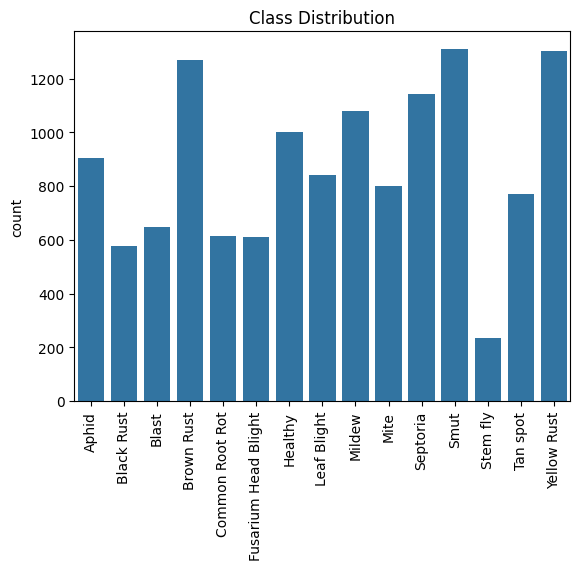

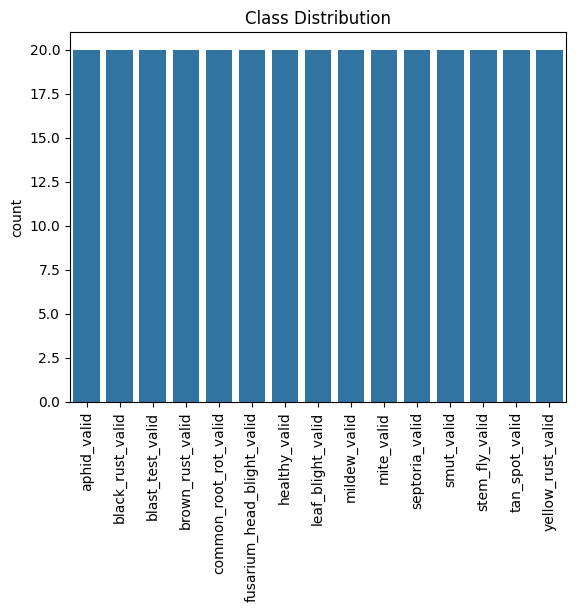

In [58]:
def plot_class_distribution(generator):
    labels = generator.classes
    class_names = list(generator.class_indices.keys())
    sns.countplot(x=labels)
    plt.title('Class Distribution')
    plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=90)
    plt.show()

# Example usage with your training and validation generators
plot_class_distribution(train_generator)
plot_class_distribution(valid_generator)


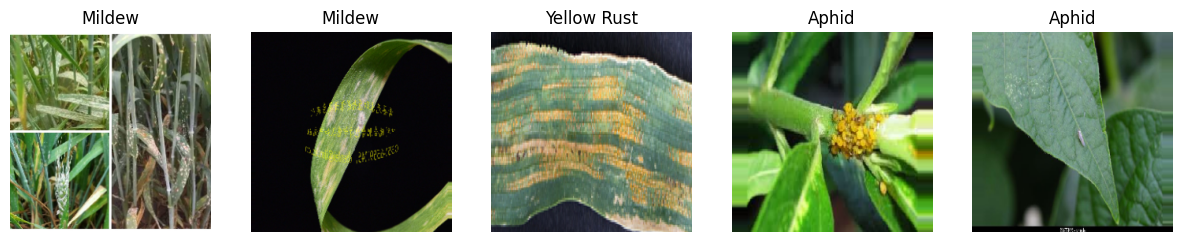

In [59]:
def display_sample_images(generator, class_names, num_samples=5):
    images, labels = next(generator)  # Get a batch of images and labels
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

# Displaying sample images
class_names = list(train_generator.class_indices.keys())
display_sample_images(train_generator, class_names)


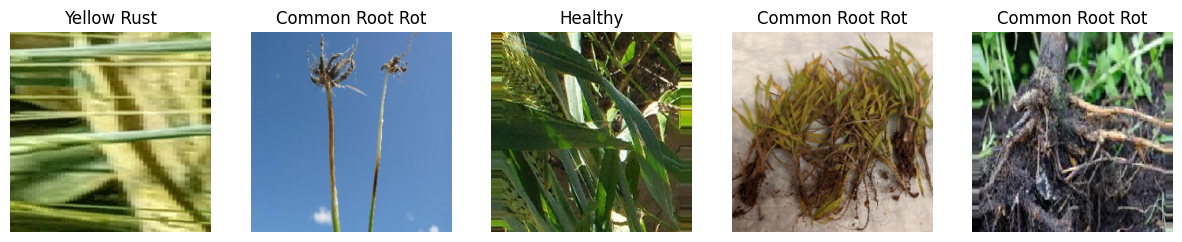

In [60]:
def visualize_augmentation(generator, class_names, num_samples=5):
    images, labels = next(generator)  # Get a batch of images and labels
    plt.figure(figsize=(15, 15))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

# Example usage
visualize_augmentation(train_generator, class_names)


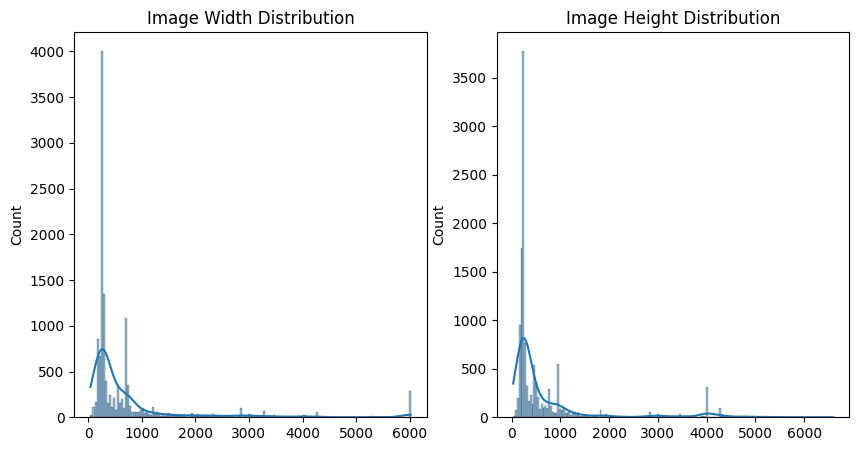

<Figure size 600x600 with 0 Axes>

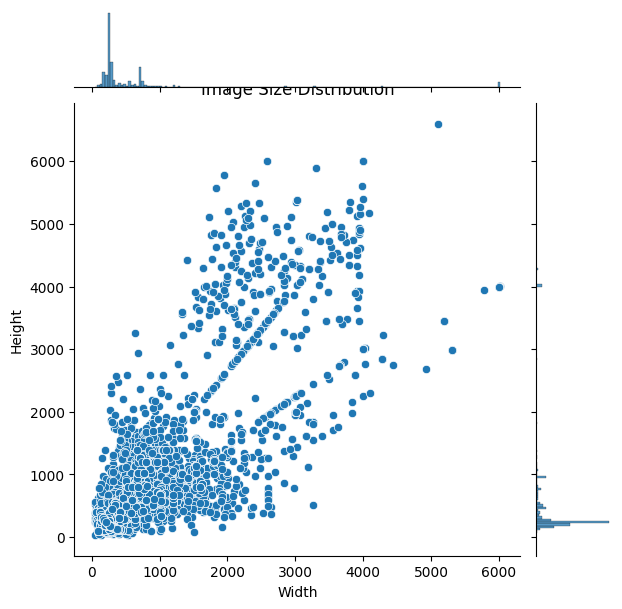

In [61]:
import os
from PIL import Image

def analyze_image_sizes(directory):
    widths, heights = [], []
    
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpeg', 'png', 'jpg', 'bmp')):
                img_path = os.path.join(subdir, file)
                with Image.open(img_path) as img:
                    width, height = img.size
                    widths.append(width)
                    heights.append(height)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(widths, kde=True)
    plt.title('Image Width Distribution')
    plt.subplot(1, 2, 2)
    sns.histplot(heights, kde=True)
    plt.title('Image Height Distribution')
    plt.show()

    plt.figure(figsize=(6, 6))
    sns.jointplot(x=widths, y=heights, kind='scatter')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title('Image Size Distribution')
    plt.show()

# Example usage
analyze_image_sizes('train')  # Replace 'train' with the path to your image directory


In [23]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(255,255,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(15,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    15,745,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,765,455 (60.14 MB)

 Trainable params: 15,765,455 (60.14 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(
        train_generator,
        batch_size=32,
        epochs=100,
        validation_data=valid_generator,
        validation_batch_size=32,
)

Epoch 1/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 291s 699ms/step - accuracy: 0.2163 - loss: 2.8757 - val_accuracy: 0.3233 - val_loss: 2.3826
Epoch 2/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 323s 778ms/step - accuracy: 0.4691 - loss: 1.7045 - val_accuracy: 0.3500 - val_loss: 2.2176
Epoch 3/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 318s 764ms/step - accuracy: 0.5430 - loss: 1.4519 - val_accuracy: 0.3867 - val_loss: 2.1569
Epoch 4/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 324s 783ms/step - accuracy: 0.5847 - loss: 1.3254 - val_accuracy: 0.3700 - val_loss: 2.1078
Epoch 5/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 326s 787ms/step - accuracy: 0.6199 - loss: 1.2125 - val_accuracy: 0.4233 - val_loss: 1.8818
Epoch 6/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 342s 824ms/step - accuracy: 0.6422 - loss: 1.1266 - val_accuracy: 0.4900 - val_loss: 1.6213
Epoch 7/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 347s 840ms/step - accuracy: 0.6712 - loss: 1.0374 - val_accuracy: 0.5400 - val_loss: 1.5176
Epoch 8/100
410/410 ━━━━━━━━━━━━━━━━━━━━ 339s 819ms/step - accuracy: 

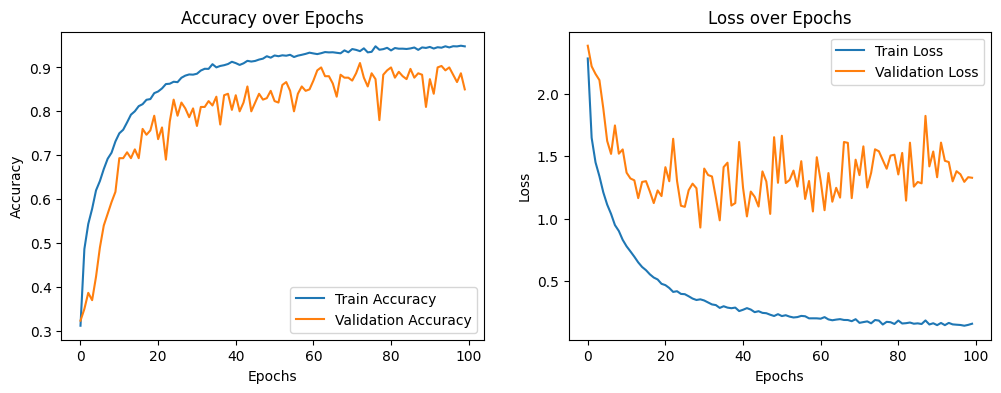

In [62]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the history
plot_training_history(history)


In [73]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his2=model.fit(
        train_generator,
        batch_size=32,
        epochs=10,
        validation_data=valid_generator,
        validation_batch_size=32,
)

Epoch 1/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 285s 684ms/step - accuracy: 0.9536 - loss: 0.1358 - val_accuracy: 0.8700 - val_loss: 1.2239
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 306s 738ms/step - accuracy: 0.9502 - loss: 0.1504 - val_accuracy: 0.8633 - val_loss: 1.7852
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 315s 760ms/step - accuracy: 0.9492 - loss: 0.1518 - val_accuracy: 0.8967 - val_loss: 1.2166
Epoch 4/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 320s 771ms/step - accuracy: 0.9523 - loss: 0.1398 - val_accuracy: 0.8767 - val_loss: 1.7533
Epoch 5/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 325s 784ms/step - accuracy: 0.9534 - loss: 0.1463 - val_accuracy: 0.8833 - val_loss: 2.0116
Epoch 6/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 346s 835ms/step - accuracy: 0.9540 - loss: 0.1293 - val_accuracy: 0.8767 - val_loss: 1.7319
Epoch 7/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 352s 850ms/step - accuracy: 0.9438 - loss: 0.1537 - val_accuracy: 0.8933 - val_loss: 1.7519
Epoch 8/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 356s 860ms/step - accuracy: 0.9531 -

In [75]:
model.save('WheatDiseaseDetection.h5')

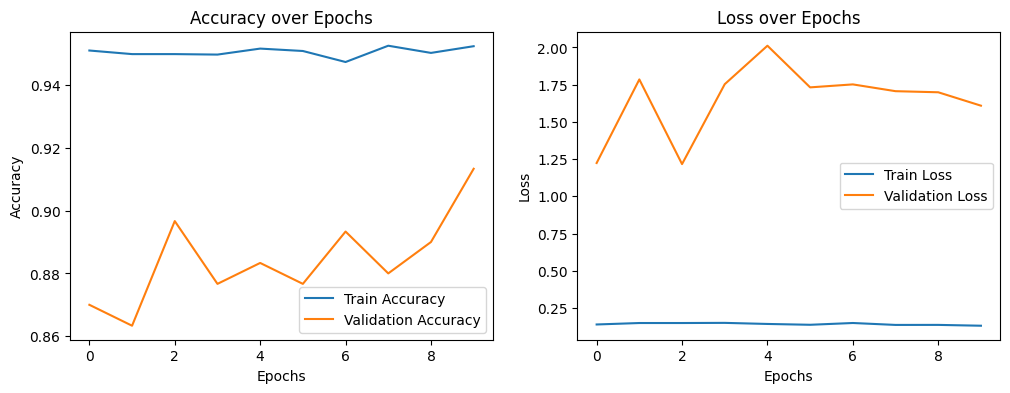

In [74]:
plot_training_history(his2)

In [48]:
test_generator = test_datagen.flow_from_directory(
    'test',
    batch_size=2,
    target_size=(255,255),
    class_mode='categorical'
)


Found 750 images belonging to 15 classes.


In [46]:
model.predict(test_generator)

6552/6552 ━━━━━━━━━━━━━━━━━━━━ 138s 21ms/step


array([[2.6386019e-32, 4.3397119e-13, 3.7462870e-27, ..., 4.3757884e-30,
        1.3006140e-17, 7.7584286e-11],
       [2.4552256e-11, 6.8655834e-05, 7.3312974e-04, ..., 1.3973170e-06,
        3.7352974e-04, 4.9169048e-06],
       [3.7011961e-35, 3.0533860e-26, 3.9286166e-35, ..., 0.0000000e+00,
        8.9838746e-29, 2.7889047e-32],
       ...,
       [3.1461455e-05, 3.3873919e-05, 4.4992587e-09, ..., 1.3363334e-08,
        7.6486349e-06, 8.6593955e-06],
       [8.7051053e-14, 1.7617332e-16, 8.7933146e-22, ..., 3.7772455e-28,
        3.7373858e-13, 7.0497091e-16],
       [9.6684796e-01, 1.6647353e-16, 2.4349758e-11, ..., 2.6762946e-21,
        2.5558205e-16, 7.7306968e-18]], dtype=float32)

In [50]:
model.evaluate(test_generator ,steps=test_generator.samples//2)

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6415 - loss: 1.2654


[1.273135781288147, 0.6333333253860474]

In [52]:
model=load_model('WheatDiseaseDetection.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    15,745,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,765,457 (60.14 MB)

 Trainable params: 15,765,455 (60.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [79]:
model.evaluate(train_generator ,steps=train_generator.samples//64)

204/204 ━━━━━━━━━━━━━━━━━━━━ 99s 486ms/step - accuracy: 0.9482 - loss: 0.1388


[0.12934434413909912, 0.9522058963775635]